In [1]:
seed = 7

In [2]:
#importing the needed libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing libraries from sklearn
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler#,Imputer
from sklearn import metrics
colours = sns.set_palette('pastel')

In [4]:
# import algorithm modules
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

##### b) Load dataset

In [9]:
#Load all datasets
dataset=pd.read_csv('datasets/basic_classification_data.csv',header=None)
dataset.head(2)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 non-null float64
33  

### 2. Summarize Data

##### a) Descriptive statistics

In [7]:
#Descriptive Statistics
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


##### b) Data visualizations

##### Check to see if the rows are reshape images

In [8]:
img = dataset.iloc[:,:-1].copy() #dataset for generating a test to see if the rows contain an image
img.shape

(208, 60)

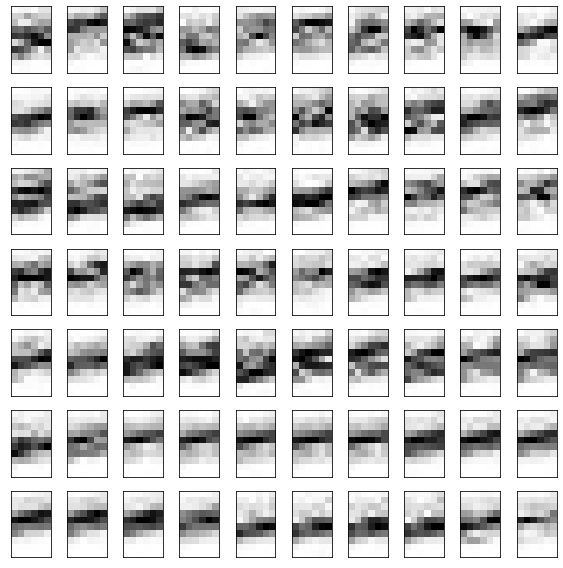

In [9]:
# plot some of the numbers
plt.figure(figsize=(8,8))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = img.iloc[digit_num].as_matrix().reshape(10,6)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = 'binary')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

#### Plot graphs

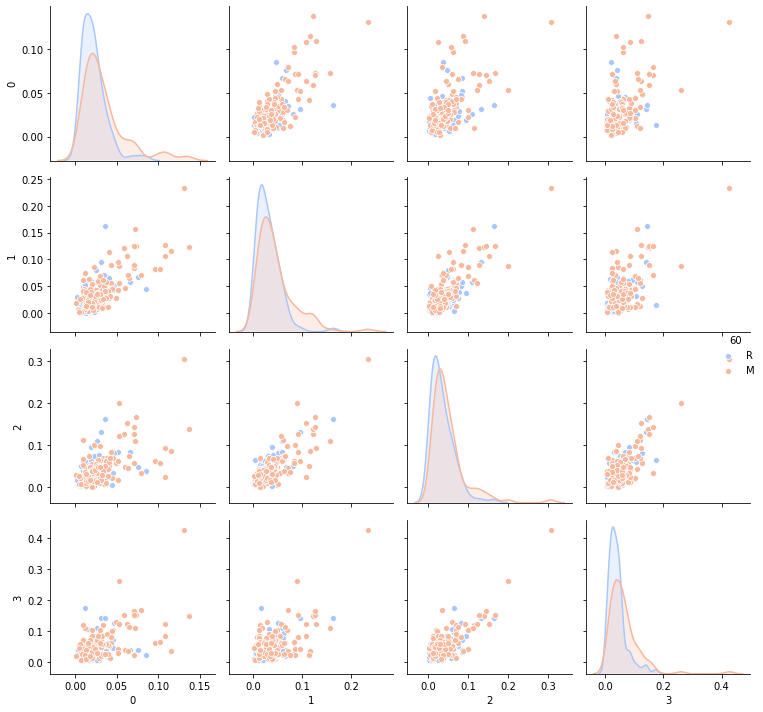

In [10]:
#Data Visualization
sns.pairplot(dataset[[60,0,1,2,3]], diag_kind='kde', hue = 60,palette='coolwarm')
plt.tight_layout()
plt.show()

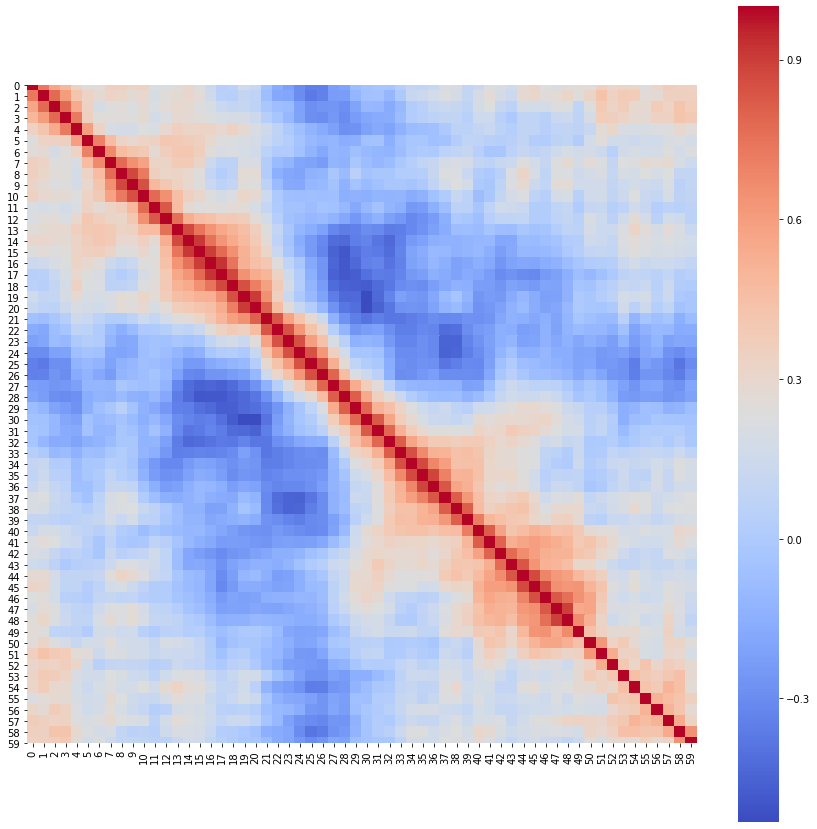

In [11]:
# correlation heat map
plt.figure(figsize=(15,15))
cor = dataset.corr()
sns.heatmap(cor, square=True, cmap='coolwarm')
plt.show()

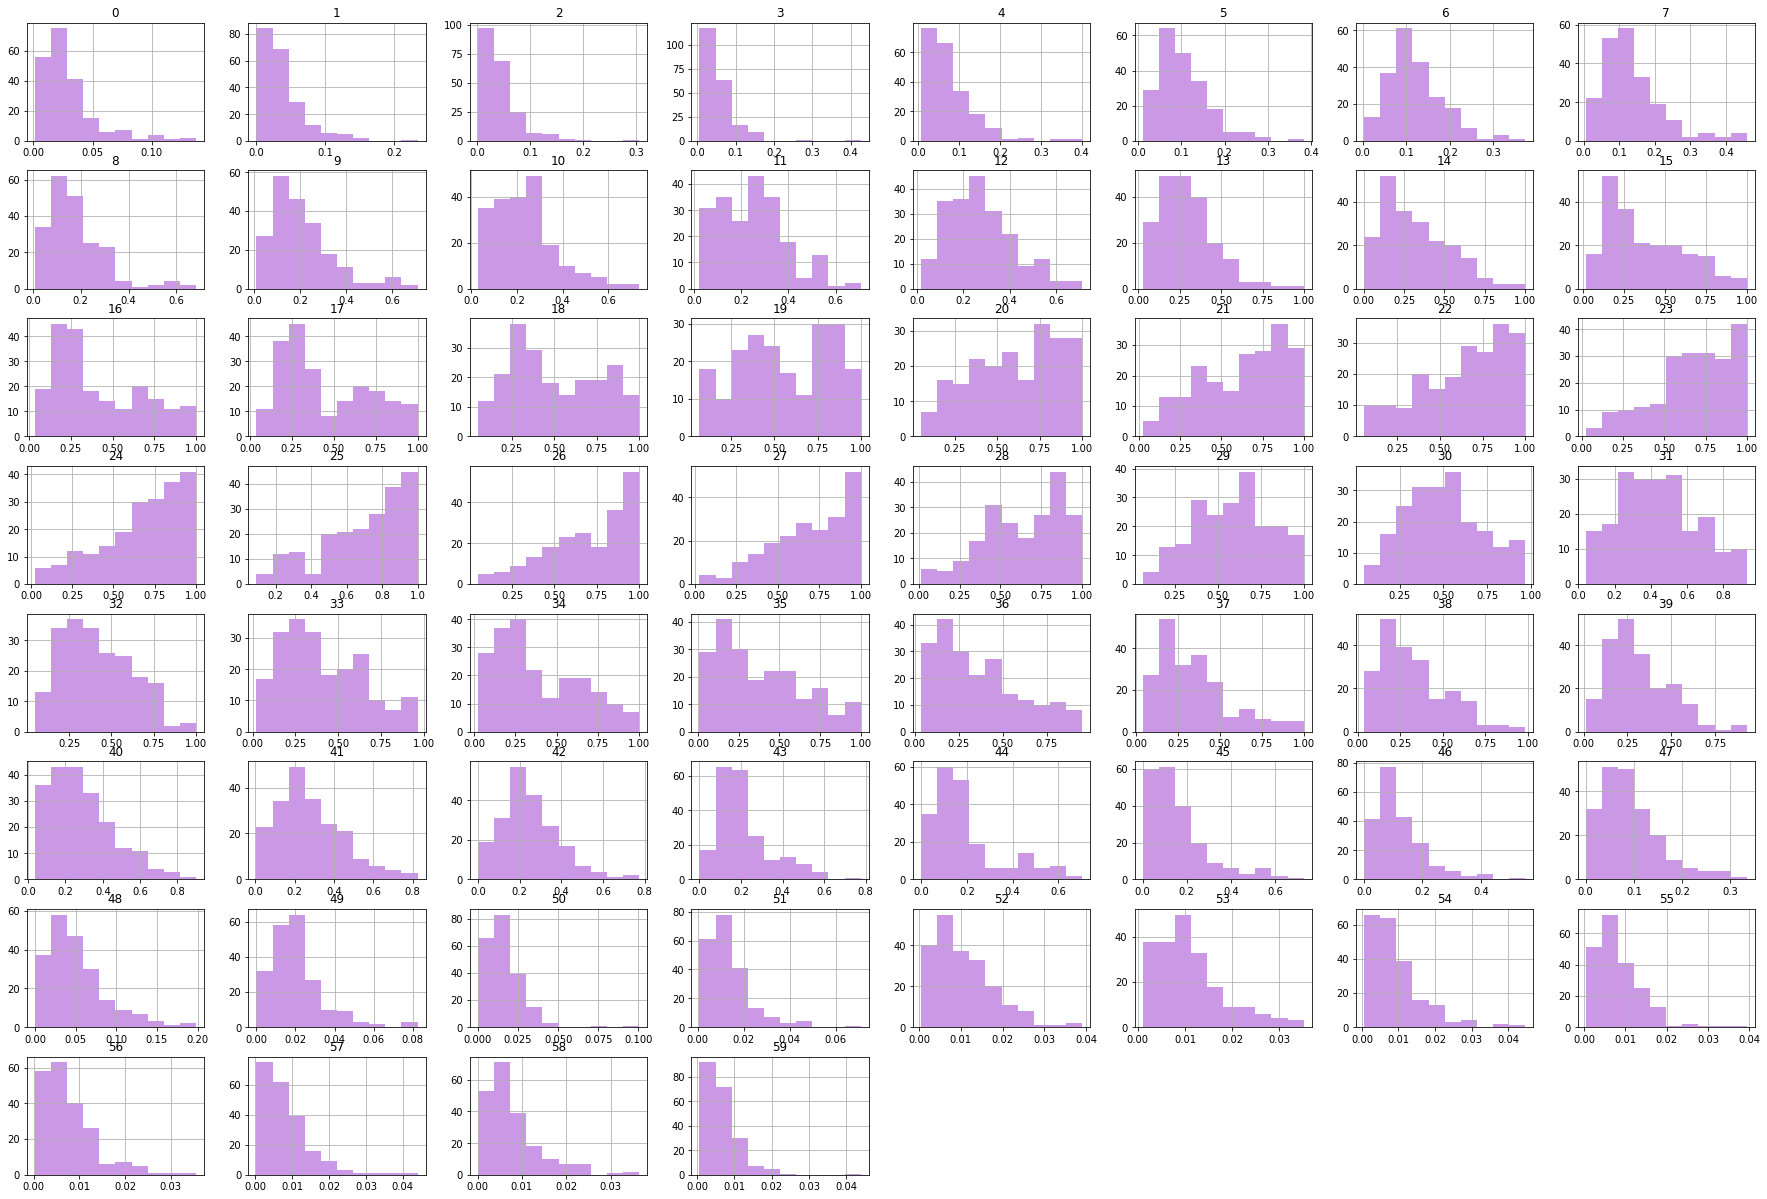

In [12]:
dataset.hist(color = 'darkorchid',alpha=0.5)
plt.subplots_adjust(top=5, bottom=1, left=1, right=5,wspace=0.25, hspace=0.25)

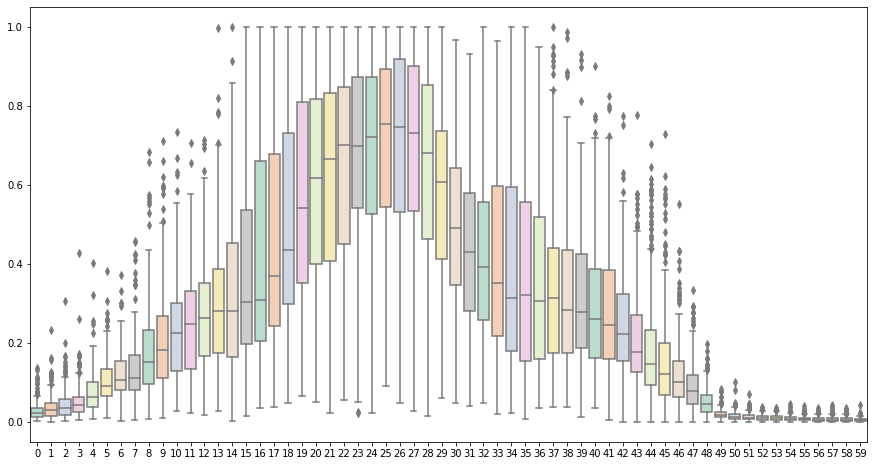

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(data=dataset,palette='Pastel2')

In [14]:
dataset_num=dataset.drop(60,axis=1)

In [15]:
dataset_num.head(2)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044


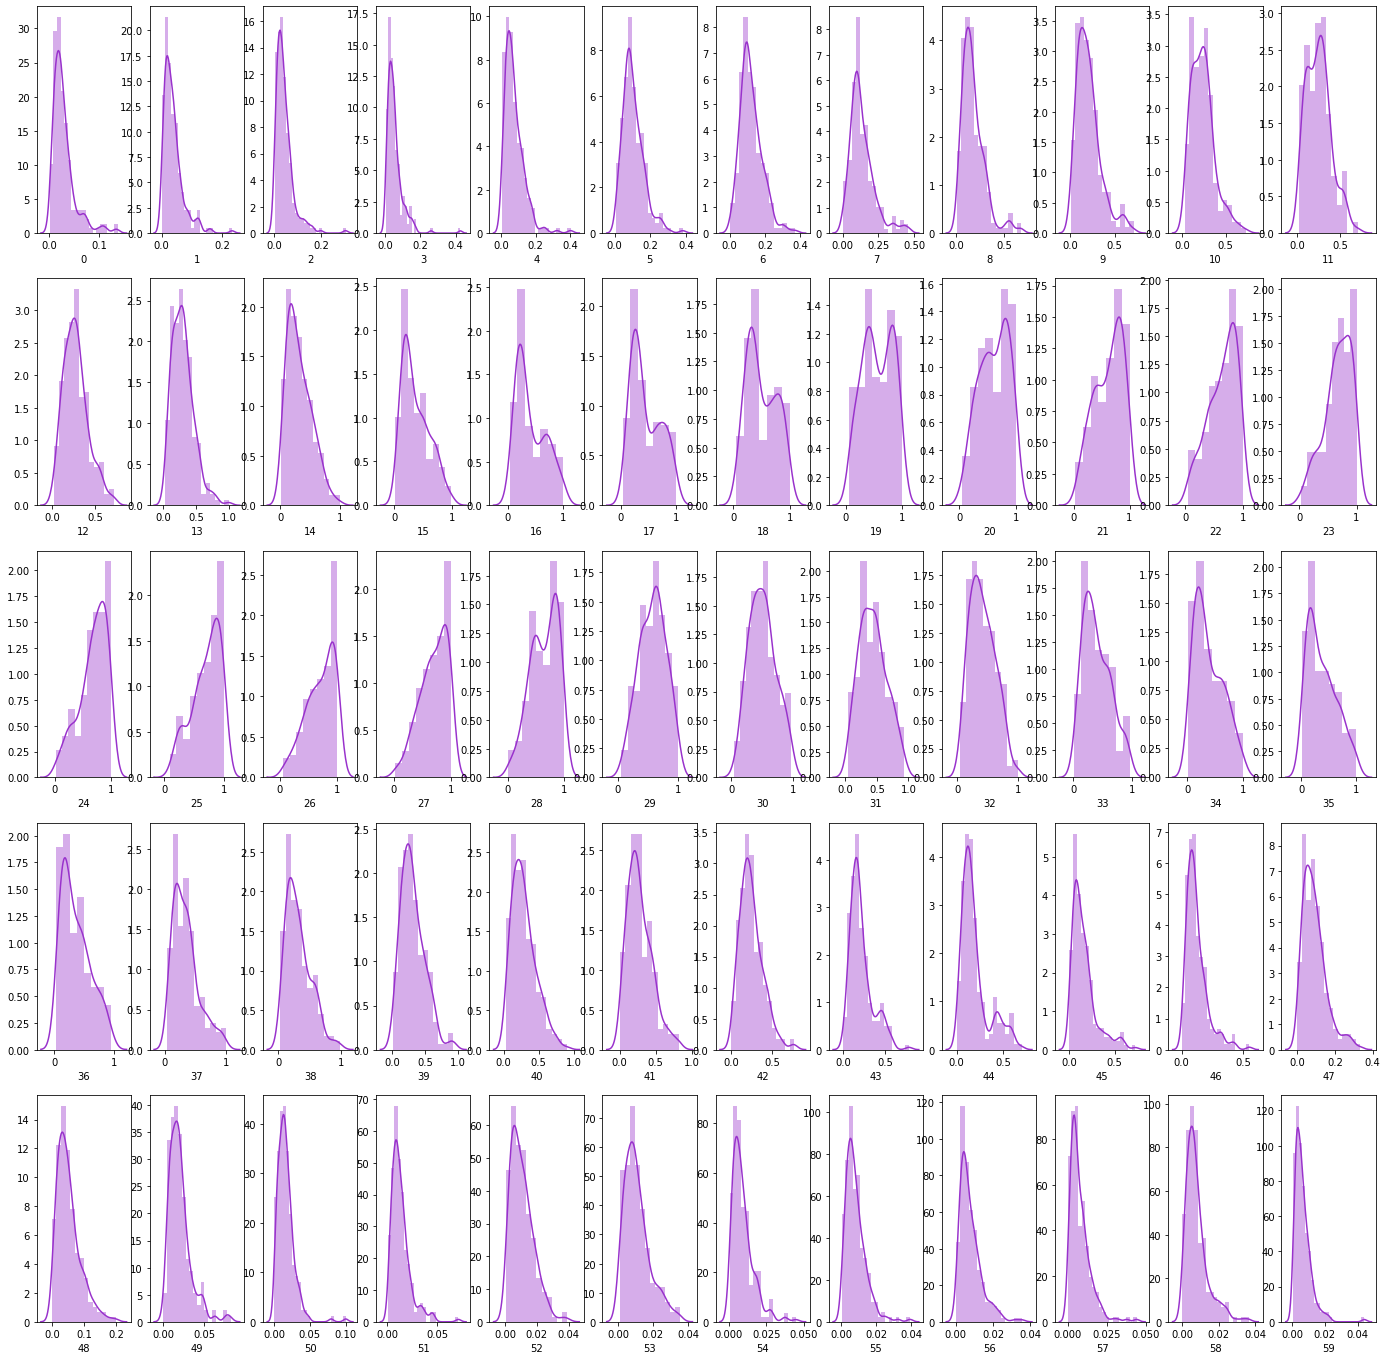

In [16]:
l = dataset_num.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(dataset_num[l[i]],kde=True, color='darkorchid') 

### 3. Prepare Data

##### a) Data Cleaning

In [17]:
#Finding the null value
dataset.isnull().sum().all

<bound method Series.all of 0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64>

In [18]:
dataset.columns[dataset.isnull().mean() > 0.5]

Int64Index([], dtype='int64')

In [19]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width', None)
dataset.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.00,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R


##### b) Feature Selection (Feature selection not done, since all the features are taken into consideration)

In [20]:
cat_cols=[col for col in dataset.columns.values if dataset[col].dtypes==('object')]
cat_cols

[60]

In [21]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for col in cat_cols:
    dataset[col] = le.fit_transform(dataset[col].astype(str))

dataset.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.00,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,1


In [22]:
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [23]:
print(X.shape)
print(y.shape)

(208, 60)
(208, 1)


##### c) Data Transforms (Normalization is performed)

In [24]:
from sklearn.preprocessing import normalize
data_scaled = normalize(dataset_num)
data_scaled = pd.DataFrame(data_scaled, columns=dataset_num.columns)
data_scaled.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.006765,0.012550,0.014478,0.007002,0.032271,0.033353,0.052059,0.054157,0.105167,0.071408,0.054427,0.053514,0.075704,0.021818,0.022326,0.076888,0.104863,0.101446,0.171772,0.162267,0.195620,0.171535,0.146402,0.187738,0.227011,0.216999,0.240305,0.273320,0.229717,0.130470,0.044212,0.088085,0.173227,0.255290,0.288779,0.287764,0.226369,0.206242,0.167206,0.092821,0.017252,0.095865,0.095561,0.143967,0.089336,0.046884,0.035552,0.045429,0.012956,0.010960,0.007848,0.000913,0.002199,0.005378,0.002436,0.005649,0.006089,0.002841,0.003044,0.001082
1,0.015166,0.017509,0.028222,0.023066,0.039604,0.086474,0.072178,0.116537,0.111716,0.096149,0.164645,0.219348,0.231634,0.261028,0.249879,0.316166,0.334780,0.297083,0.268627,0.261731,0.174487,0.135653,0.132472,0.131033,0.108803,0.107129,0.109506,0.092634,0.148073,0.067893,0.126815,0.098660,0.066420,0.078372,0.043722,0.140005,0.128388,0.035386,0.061599,0.065952,0.056042,0.019518,0.046903,0.054502,0.020790,0.006796,0.017743,0.024841,0.013692,0.002042,0.004185,0.002812,0.002980,0.001607,0.003147,0.006394,0.004687,0.001640,0.001741,0.001473


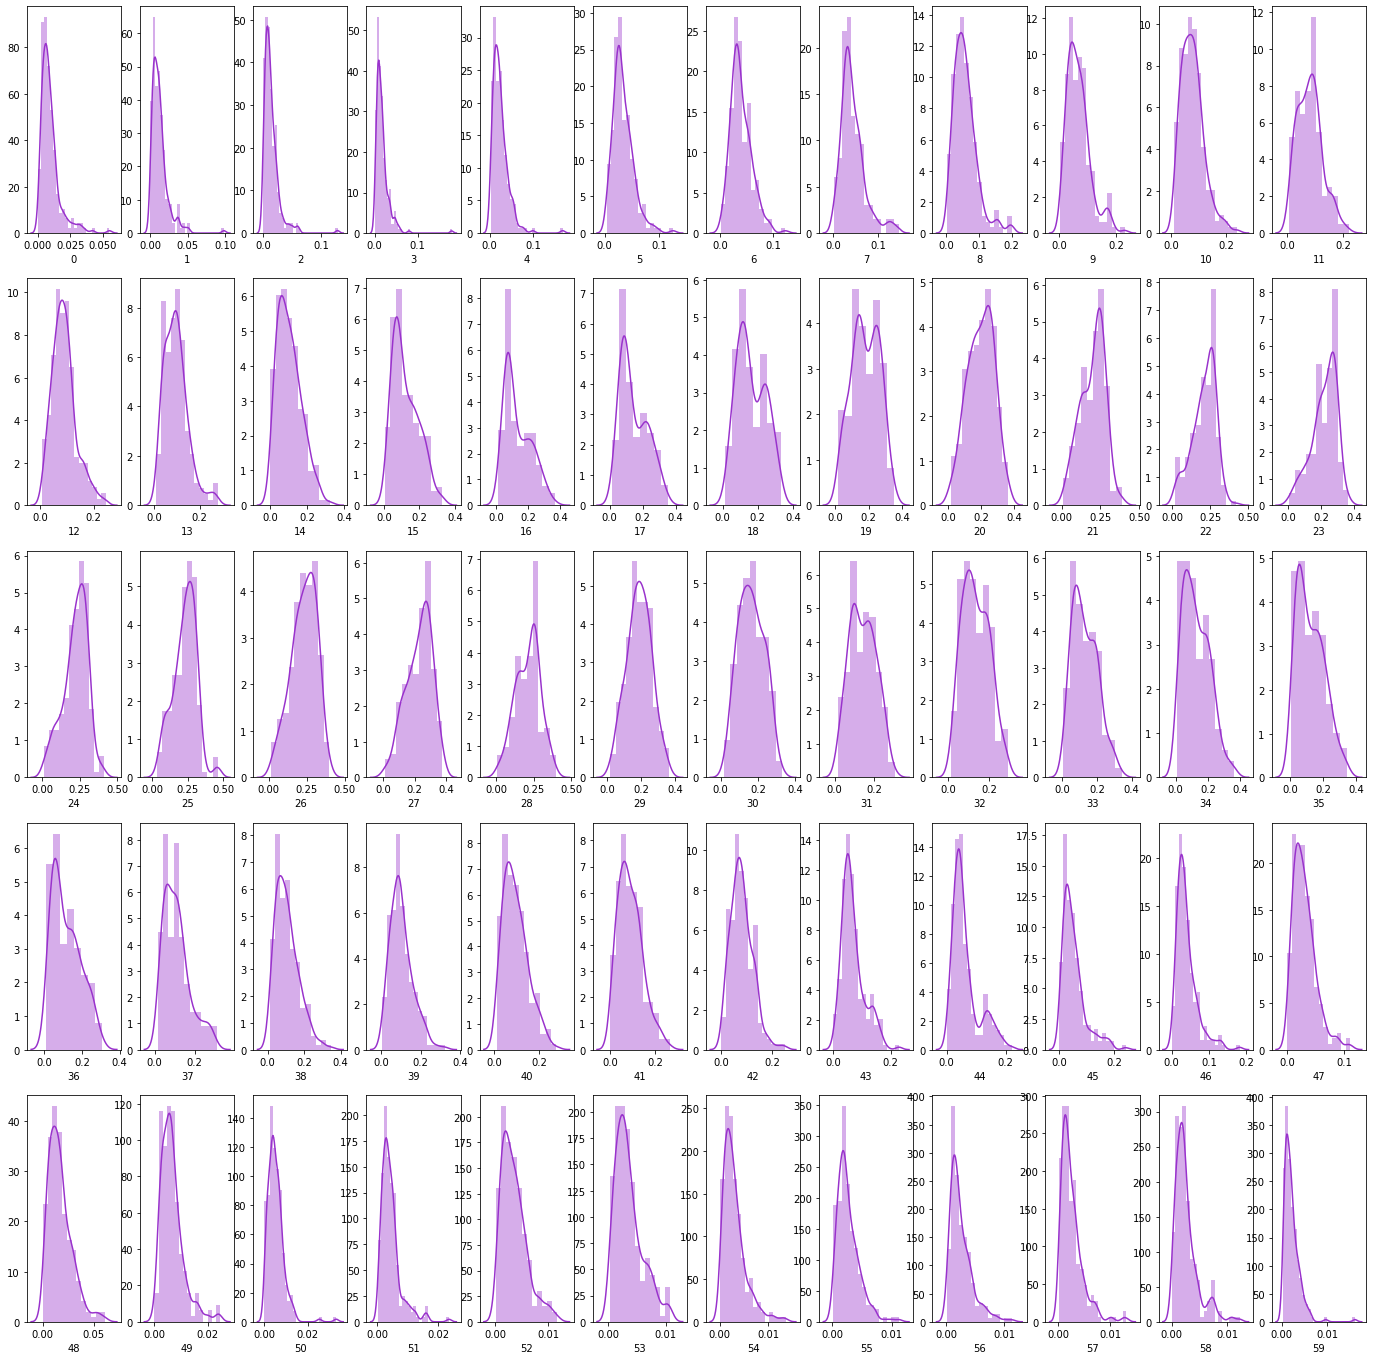

In [25]:
#Visualizing Data after normalization
l = data_scaled.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(data_scaled[l[i]],kde=True, color='darkorchid')

## 4. Evaluate Algorithms

##### a) Split-out validation dataset

In [26]:
# a)Split-out Validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

##### b) Test options and evaluation metric

In [27]:
# Feature scaling
pca = PCA(n_components=60, random_state=seed)
principalComponents = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([3.03298625e-01, 2.03906289e-01, 8.78175278e-02, 6.73679253e-02,
       5.73050436e-02, 4.72932929e-02, 4.10066275e-02, 2.95703142e-02,
       2.29536305e-02, 1.91218424e-02, 1.63305772e-02, 1.46802206e-02,
       1.10701459e-02, 1.02077280e-02, 9.71663215e-03, 7.89150010e-03,
       7.62268170e-03, 6.18130167e-03, 4.98950057e-03, 4.43835337e-03,
       3.44099872e-03, 2.93104925e-03, 2.52380831e-03, 2.07682614e-03,
       1.86498492e-03, 1.71305576e-03, 1.60822283e-03, 1.43243621e-03,
       1.12742285e-03, 1.03205516e-03, 9.35280175e-04, 7.85351821e-04,
       7.16374720e-04, 6.71607666e-04, 5.81076699e-04, 5.30589249e-04,
       4.76879388e-04, 4.42572931e-04, 3.83747745e-04, 3.54289065e-04,
       3.18683606e-04, 3.15840883e-04, 2.07948848e-04, 1.58246461e-04,
       1.44704487e-04, 1.33760906e-04, 6.81249125e-05, 5.91282297e-05,
       4.91564096e-05, 4.14779362e-05, 2.28794445e-05, 1.97875067e-05,
       1.52131591e-05, 1.17620292e-05, 9.40233789e-06, 7.77235943e-06,
      

In [28]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(principalComponents, y_train, test_size=0.3, random_state=seed)
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=seed)

#### Import Algorithms

In [29]:
#DecisionTreeRegressor
def decisionTree(x,y):
    model = DecisionTreeClassifier(criterion='gini',
                                   splitter='random',
                                   max_depth=8,
                                   max_features='log2')
    model.fit(x, y)
    return model

decision_mod = decisionTree(X_train, y_train)

In [30]:
#Random Forest Regression
def forestRegression(x,y):
    model = RandomForestClassifier(n_estimators = 100,
                                   random_state = seed,
                                   max_depth = 40)
    model.fit(x, y)
    return model
    
forest_mod = forestRegression(X_train, y_train)

In [31]:
#K Neighbors Classifier
def kNeighbors(x,y):
    model = KNeighborsClassifier(algorithm='auto',
                                 leaf_size=30,
                                 metric='minkowski',
                                 metric_params=None,
                                 n_jobs=None,
                                 n_neighbors=5,
                                 p=2,
                                 weights='uniform')
    model.fit(x, y)
    return model
    
knn_mod = kNeighbors(X_train, y_train)

In [32]:
#Create a Gaussian Classifier
def gaussianNB(x,y):
    model = GaussianNB(priors=None,
                       var_smoothing=1e-09)
    model.fit(x, y)
    return model
    
gnb_mod = gaussianNB(X_train, y_train)

In [33]:
#Create a svm Classifier
def SVM(x,y):
    model = svm.SVC(kernel='rbf',
                    gamma ='scale')
    model.fit(x, y)
    return model
    
svm_mod = SVM(X_train, y_train)

##### c) Spot Check Algorithms

In [34]:
def print_Report(z,a,b,c,d,e,x,y):
    print(f'\n {z} \n')
    print(f'Decision Tree Score: {round(a.score(x, y),3)}')
    print(f'Random Forest Score: {round(b.score(x, y),3)}')
    print(f'KNN Score:           {round(c.score(x, y),3)}')
    print(f'Gaussian NB Score:   {round(d.score(x, y),3)}')
    print(f'SVM Score:           {round(e.score(x, y),3)}')

def confClassReport(a,b,x,y):
    print('\nConfusion Matrix & Classification Report')
    print(f'\n {a}')
    print(metrics.confusion_matrix(y,b.predict(x)),)
    print(metrics.classification_report(y,b.predict(x)))

In [35]:
text = 'Training Set'
print_Report(text,decision_mod,forest_mod,knn_mod,gnb_mod,svm_mod,X_train,y_train)


 Training Set 

Decision Tree Score: 0.952
Random Forest Score: 1.0
KNN Score:           0.848
Gaussian NB Score:   0.71
SVM Score:           0.883


In [36]:
text = 'Testing Set'
print_Report(text,decision_mod,forest_mod,knn_mod,gnb_mod,svm_mod,X_test,y_test)


 Testing Set 

Decision Tree Score: 0.683
Random Forest Score: 0.857
KNN Score:           0.714
Gaussian NB Score:   0.698
SVM Score:           0.81


In [37]:
text = 'Regularized Training Set'
print_Report(text,decision_mod,forest_mod,knn_mod,gnb_mod,svm_mod,reg_X_test,reg_y_test)


 Regularized Training Set 

Decision Tree Score: 1.0
Random Forest Score: 1.0
KNN Score:           0.864
Gaussian NB Score:   0.75
SVM Score:           0.909


In [38]:
text = 'PCA Reduced Test Set'
print_Report(text,decision_mod,forest_mod,knn_mod,gnb_mod,svm_mod,pca_X_test,pca_y_test)


 PCA Reduced Test Set 

Decision Tree Score: 0.432
Random Forest Score: 0.409
KNN Score:           0.409
Gaussian NB Score:   0.591
SVM Score:           0.409


In [39]:
#text = 'CORR A Training Set'
#print_Report(text,decision_mod,forest_mod,knn_mod,gnb_mod,svm_mod,D_train,e_train)

In [40]:
decision_pred = decision_mod.predict(X_test)
forest_pred = forest_mod.predict(X_test)
knn_pred = knn_mod.predict(X_test)
gnb_pred = gnb_mod.predict(X_test)
svm_pred = svm_mod.predict(X_test)

##### d) Compare Algorithms

In [41]:
text = 'Decision Tree Classifier\n'
confClassReport(text,decision_mod,X_test,y_test)


Confusion Matrix & Classification Report

 Decision Tree Classifier

[[22 13]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.76      0.63      0.69        35
           1       0.62      0.75      0.68        28

    accuracy                           0.68        63
   macro avg       0.69      0.69      0.68        63
weighted avg       0.70      0.68      0.68        63



In [42]:
text = 'Random Forest Classifier\n'
confClassReport(text,forest_mod,X_test,y_test)


Confusion Matrix & Classification Report

 Random Forest Classifier

[[33  2]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        35
           1       0.91      0.75      0.82        28

    accuracy                           0.86        63
   macro avg       0.87      0.85      0.85        63
weighted avg       0.86      0.86      0.85        63



In [43]:
text = 'KNN Classifier\n'
confClassReport(text,knn_mod,X_test,y_test)


Confusion Matrix & Classification Report

 KNN Classifier

[[27  8]
 [10 18]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        35
           1       0.69      0.64      0.67        28

    accuracy                           0.71        63
   macro avg       0.71      0.71      0.71        63
weighted avg       0.71      0.71      0.71        63



In [44]:
text = 'Gaussian NB Classifier\n'
confClassReport(text,gnb_mod,X_test,y_test)


Confusion Matrix & Classification Report

 Gaussian NB Classifier

[[22 13]
 [ 6 22]]
              precision    recall  f1-score   support

           0       0.79      0.63      0.70        35
           1       0.63      0.79      0.70        28

    accuracy                           0.70        63
   macro avg       0.71      0.71      0.70        63
weighted avg       0.72      0.70      0.70        63



In [45]:
text = 'SVM Classifier\n'
confClassReport(text,svm_mod,X_test,y_test)


Confusion Matrix & Classification Report

 SVM Classifier

[[31  4]
 [ 8 20]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        35
           1       0.83      0.71      0.77        28

    accuracy                           0.81        63
   macro avg       0.81      0.80      0.80        63
weighted avg       0.81      0.81      0.81        63



In [46]:
from sklearn import metrics

a1 = metrics.accuracy_score(y_test, decision_pred)
a2 = metrics.accuracy_score(y_test, forest_pred)
a3 = metrics.accuracy_score(y_test, knn_pred)
a4 = metrics.accuracy_score(y_test, gnb_pred)
a5 = metrics.accuracy_score(y_test, svm_pred)

print('Decision Tree Accuracy:           ', round(a1,2))
print('Random Forest Classifier Accuracy:', round(a2,2))
print('KNN Accuracy:                     ', round(a3,2))
print('Gaussian NB Accuracy:             ', round(a4,2))
print('SVM Accuracy:                     ', round(a5,2))

Decision Tree Accuracy:            0.68
Random Forest Classifier Accuracy: 0.86
KNN Accuracy:                      0.71
Gaussian NB Accuracy:              0.7
SVM Accuracy:                      0.81


In [47]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    plt.figure(figsize=(15,5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator,
                                                            X,
                                                            y,
                                                            cv=cv,
                                                            n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.25,
                     color='skyblue')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.25,
                     color='lightgreen')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='royalblue',
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '>-', color='seagreen',
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/home/todd/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

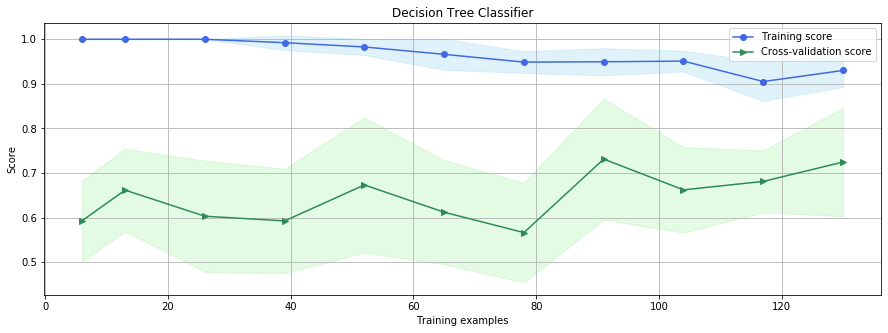

In [48]:
plot_learning_curve(decision_mod,
                        'Decision Tree Classifier', X_train, y_train, ylim = None,
                        cv = 10,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

<module 'matplotlib.pyplot' from '/home/todd/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

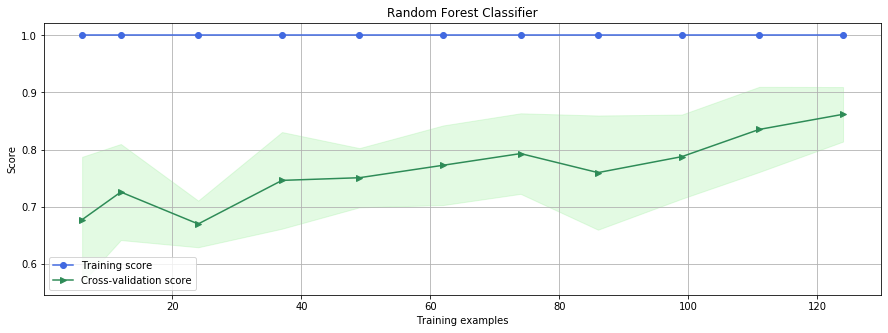

In [49]:
plot_learning_curve(forest_mod,
                        'Random Forest Classifier', X_train, y_train, ylim = None,
                        cv = 7,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

<module 'matplotlib.pyplot' from '/home/todd/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

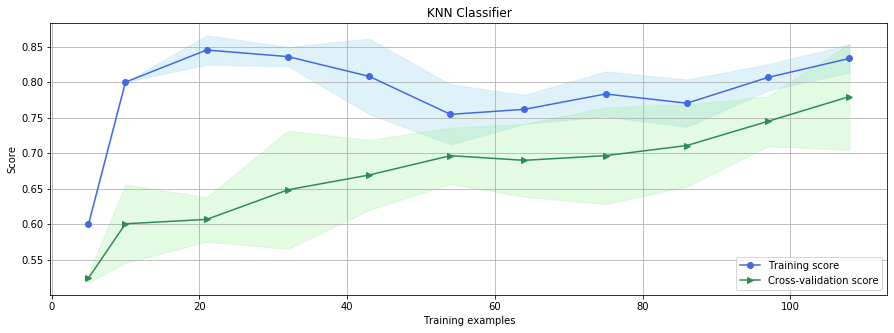

In [50]:
plot_learning_curve(knn_mod,
                        'KNN Classifier', X_train, y_train, ylim = None,
                        cv = 4,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

<module 'matplotlib.pyplot' from '/home/todd/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

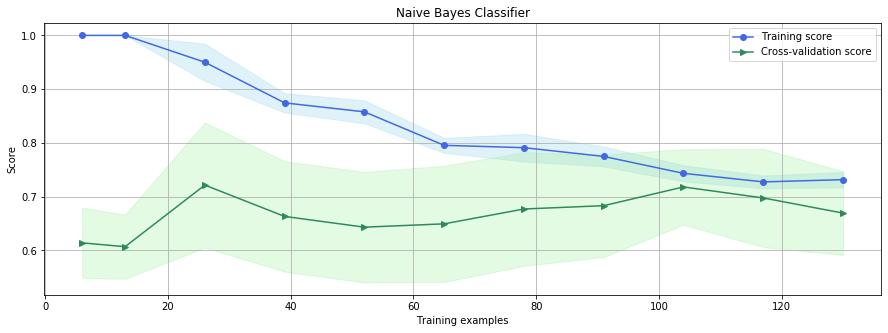

In [51]:
plot_learning_curve(gnb_mod,
                        'Naive Bayes Classifier', X_train, y_train, ylim = None,
                        cv = 10,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

<module 'matplotlib.pyplot' from '/home/todd/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

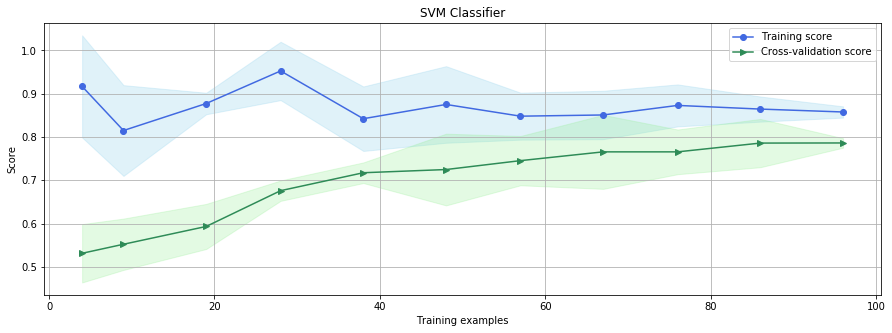

In [52]:
plot_learning_curve(svm_mod,
                        'SVM Classifier', X_train, y_train, ylim = None,
                        cv = 3,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

### 5. Improve Accuracy

##### a) Algorithm Tuning

In [53]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)  

### Random Forest and SVM had the highest Accuracy
---
Tuning the Algorithms

In [54]:
#Random Forest Regression
def forestRegression_2(x,y):
    model = RandomForestClassifier(n_estimators = 1000,
                                   min_samples_leaf = 5,
                                   min_samples_split = 12,
                                   random_state = seed,
                                   max_depth = 80)
    model.fit(x, y)
    return model
    
forest_mod = forestRegression_2(X_train, y_train)

In [55]:
#Create a svm Classifier
def SVM_2(x,y):
    model = svm.SVC(kernel='poly',degree=8, gamma ='scale')
    model.fit(x, y)
    return model

svm_mod = SVM_2(X_train, y_train)

In [56]:
#Predict the response for test dataset
#forest_pred = forest_mod.predict(X_test)
#svm_pred = svm_mod.predict(X_test)
forest_pred = forest_mod.predict(reg_X_test)
svm_pred = svm_mod.predict(reg_X_test)
#a1 = metrics.accuracy_score(y_test, forest_pred)
#a2 = metrics.accuracy_score(y_test, svm_pred)
a1 = metrics.accuracy_score(reg_y_test, forest_pred)
a2 = metrics.accuracy_score(reg_y_test, svm_pred)
print('Random Forest Accuracy: ', round(a1,2))
print('SVM Accuracy:           ', round(a2,2))

Random Forest Accuracy:  1.0
SVM Accuracy:            1.0


In [57]:
text = 'Random Forest Classifier\n'
confClassReport(text,forest_mod,X_test,y_test)
text = 'SVM Classifier\n'
confClassReport(text,svm_mod,X_test,y_test)


Confusion Matrix & Classification Report

 Random Forest Classifier

[[33  2]
 [ 8 20]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87        35
           1       0.91      0.71      0.80        28

    accuracy                           0.84        63
   macro avg       0.86      0.83      0.83        63
weighted avg       0.85      0.84      0.84        63


Confusion Matrix & Classification Report

 SVM Classifier

[[30  5]
 [ 5 23]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        35
           1       0.82      0.82      0.82        28

    accuracy                           0.84        63
   macro avg       0.84      0.84      0.84        63
weighted avg       0.84      0.84      0.84        63



##### b) Ensembles

In [58]:
# Bagged Decision Trees for Classification - necessary dependencies
def baggedTree(x,y,seed):
    model = BaggingClassifier(base_estimator=decision_mod,
                              n_estimators=100,
                              random_state=seed)
    model.fit(x, y)
    return model

bag_mod = baggedTree(X_train, y_train,seed)

In [59]:
# AdaBoost Classification
def adaBoost(x,y,seed):
    model = AdaBoostClassifier(n_estimators=70,
                               random_state=seed)
    model.fit(x, y)
    return model
    
ada_mod = adaBoost(X_train, y_train,seed)

In [60]:
# Voting Ensemble for Classification
def ensembleClassifier(x,y):
    # create the sub models
    estimators = []
    estimators.append(('DecisionTree', decision_mod))
    estimators.append(('RandomForest', forest_mod))
    estimators.append(('KNN', knn_mod))
    estimators.append(('Gaussian NB', gnb_mod))
    estimators.append(('svm', svm_mod))


    # create the ensemble model
    model = VotingClassifier(estimators)
    model.fit(x,y)
    return model

ensemble_mod = ensembleClassifier(X_train, y_train)

In [61]:
text = 'Bagged Classifier\n'
confClassReport(text,bag_mod,X,y)
results = model_selection.cross_val_score(bag_mod, X, y, cv=kfold)
print('\nCross Validation score: ',round(results.mean(),2))

text = 'Ada Boost Classifier\n'
confClassReport(text,ada_mod,X,y)
results = model_selection.cross_val_score(ada_mod, X, y, cv=kfold)
print('\nCross Validation score: ',round(results.mean(),2))

text = 'Ensemble Classifier\n'
confClassReport(text,ensemble_mod,X,y)
results = model_selection.cross_val_score(ensemble_mod, X, y, cv=kfold)
print('\nCross Validation score: ',round(results.mean(),2))

print(f'\nEnsemble Classifier Complete Set \n')
print(f'Ensemble Score: {round(ensemble_mod.score(X, y),3)}')


Confusion Matrix & Classification Report

 Bagged Classifier

[[109   2]
 [  6  91]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       111
           1       0.98      0.94      0.96        97

    accuracy                           0.96       208
   macro avg       0.96      0.96      0.96       208
weighted avg       0.96      0.96      0.96       208


Cross Validation score:  0.49

Confusion Matrix & Classification Report

 Ada Boost Classifier

[[106   5]
 [  9  88]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       111
           1       0.95      0.91      0.93        97

    accuracy                           0.93       208
   macro avg       0.93      0.93      0.93       208
weighted avg       0.93      0.93      0.93       208


Cross Validation score:  0.66

Confusion Matrix & Classification Report

 Ensemble Classifier

[[105   6]
 [ 11  86]]
              precisi

### 6. Finalize Model

##### a) Predictions on validation dataset

In [62]:
def predictionTest():
    num = int(input('Enter a number under or equal to 207:\n'))
    p = X.iloc[num].tolist()
    a = decision_mod.predict([p]).flatten()
    b = forest_mod.predict([p]).flatten()
    c = knn_mod.predict([p]).flatten()
    d = gnb_mod.predict([p]).flatten()
    e = svm_mod.predict([p]).flatten()
    f = bag_mod.predict([p]).flatten()
    g = ada_mod.predict([p]).flatten()
    h = ensemble_mod.predict([p]).flatten()
    print('\nPredictions\n')
    print('Actual       : ',dataset[60].iloc[num])
    print('Decision Tree: ', a)
    print('Random Forest: ', b)
    print('KNN          : ', c)
    print('Gaussian NB  : ', d)
    print('SVM          : ', e)
    print('Bagged       : ', f)
    print('Ada Boost    : ', g)
    print('Ensemble     : ', h)
predictionTest()

Enter a number under or equal to 207:
56

Predictions

Actual       :  1
Decision Tree:  [1]
Random Forest:  [1]
KNN          :  [1]
Gaussian NB  :  [1]
SVM          :  [1]
Bagged       :  [1]
Ada Boost    :  [1]
Ensemble     :  [1]


##### b) Create standalone model on entire training dataset

In [63]:
infer = X.iloc[176].tolist()

In [64]:
# Saving model to disk
pickle.dump(ensemble_mod, open('ensemble_model.pkl','wb'))

##### c) Save model for later use

In [65]:
# Loading model to compare the results
imported_mod = pickle.load( open('ensemble_model.pkl','rb'))
print(f'\nBased on the inputed data, the result is: {imported_mod.predict([infer])}')


Based on the inputed data, the result is: [0]
